In [74]:
# Import Stuff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy.stats import linregress

In [75]:
# Import File
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


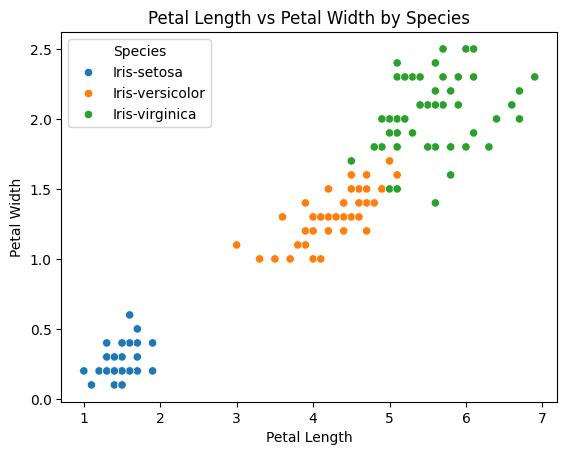

In [76]:
# Visualize Functions
sns.scatterplot(
    data=iris, x='Petal Length', 
    y='Petal Width', hue='Species'
    )

plt.title('Petal Length vs Petal Width by Species')
plt.show()

### Visual Correlation Description

From the scatterplot of Petal Length vs Petal Width by Species, there is a clear positive correlation between petal length and petal width for all species. As petal length increases, petal width also tends to increase.

However, the three species form distinct clusters. Setosa has the smallest petal length and width and virginica has the largest. Versicolor falls in between. While all species show a positive trend, the range and spread of values are different, and the clusters do not overlap very much. This implies that although the relationship between petal length and width is similar for all species, each species is in a different region in the plot.

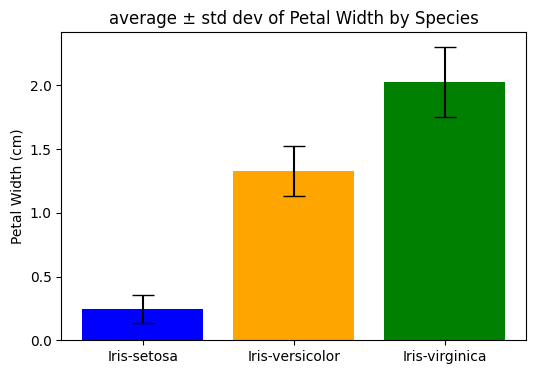

In [77]:
# Plotting mean and std dev Petal Width

petal_width_stats = iris.groupby('Species')['Petal Width'].agg(['mean', 'std'])


plt.figure(figsize=(6,4))
plt.bar(petal_width_stats.index, petal_width_stats['mean'], 
        yerr=petal_width_stats['std'], capsize=8, color=['blue', 'orange', 'green'])
plt.ylabel('Petal Width (cm)')
plt.title('average ± std dev of Petal Width by Species')
plt.show()

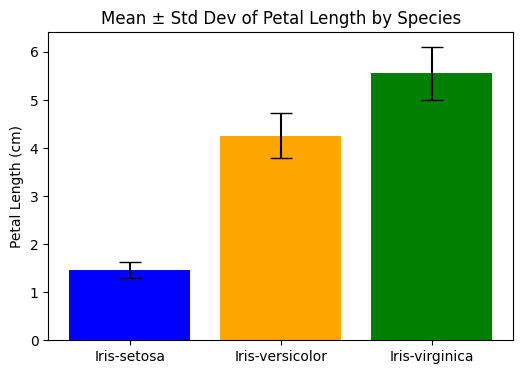

In [78]:
# Plotting mean and std dev for Petal Length

petal_length_stats = iris.groupby('Species')['Petal Length'].agg(['mean', 'std'])

plt.figure(figsize=(6,4))
plt.bar(petal_length_stats.index, petal_length_stats['mean'], 
        yerr=petal_length_stats['std'], capsize=8, color=['blue', 'orange', 'green'])
plt.ylabel('Petal Length (cm)')
plt.title('Mean ± Std Dev of Petal Length by Species')
plt.show()

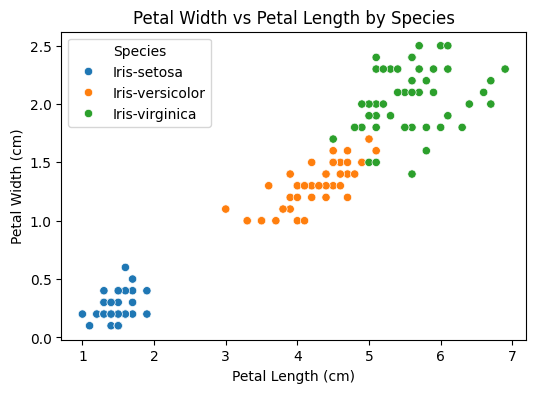

In [79]:
# Scatter plot

plt.figure(figsize=(6,4))
sns.scatterplot(data=iris, x='Petal Length', y='Petal Width', hue='Species')

plt.title('Petal Width vs Petal Length by Species')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()

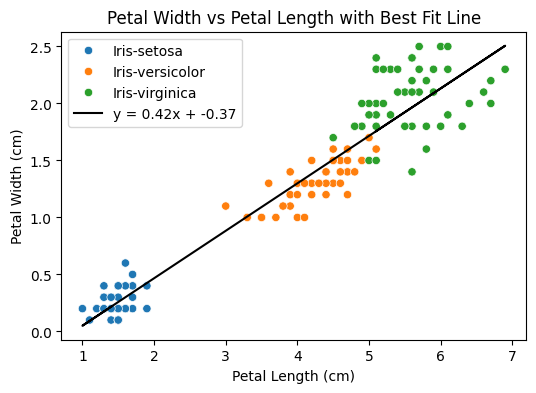

Best fit line: y = 0.42x + -0.37


In [80]:
# Linear regression: Petal Width vs Petal Length

x = iris['Petal Length']
y = iris['Petal Width']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.figure(figsize=(6,4))
sns.scatterplot(data=iris, x='Petal Length', y='Petal Width', hue='Species')
plt.plot(x, slope*x + intercept, color='black', label=f'y = {slope:.2f}x + {intercept:.2f}')

plt.title('Petal Width vs Petal Length with Best Fit Line')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.legend()
plt.show()

print(f'Best fit line: y = {slope:.2f}x + {intercept:.2f}')

In [81]:
# Coefficient of determination for Petal Width vs Petal Length

print(f'Coefficient of determination (R^2): {r_value**2:.3f}')

Coefficient of determination (R^2): 0.927


### Interpretation of Coefficient of Determination

The coefficient of determination (R^2) represents the amount of variance in petal width that can be explained by petal length using a linear trendline. For example, if R^2 was 0.93, it means that 93% of the variation in petal width can be predicted from petal length. This indicates a strong linear relationship between the two variables in the dataset.

### What R^2 Cannot Convey

The coefficient of determination (R^2) does not indicate whether the relationship between the variables is causal. It also does not reveal whether the relationship is linear for all ranges of the data, nor does it show if the model is appropriate or if there are outliers or influential points affecting the fit.

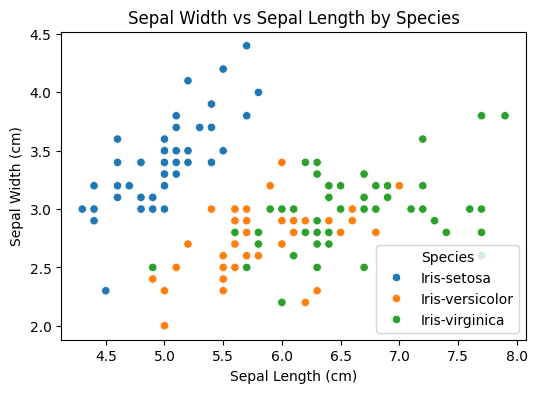

In [82]:
# Scatter plot of Sepal Width vs Sepal Length

plt.figure(figsize=(6,4))

sns.scatterplot(
    data=iris, x='Sepal Length', 
    y='Sepal Width', hue='Species'
    )

plt.title('Sepal Width vs Sepal Length by Species')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

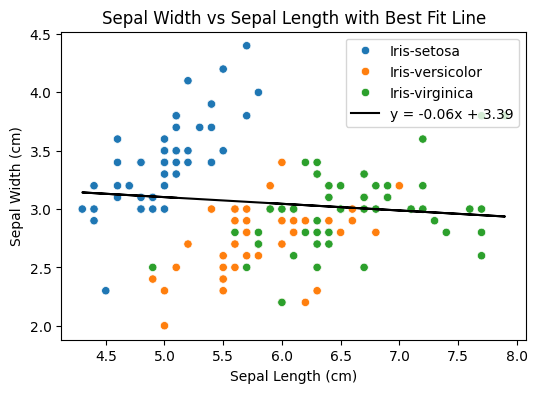

Best fit line: y = -0.06x + 3.39


In [83]:
# Linear regression: Sepal Width vs Sepal Length

x_sepal = iris['Sepal Length']
y_sepal = iris['Sepal Width']

slope_sepal, intercept_sepal, r_value_sepal, p_value_sepal, std_err_sepal = linregress(x_sepal, y_sepal)

plt.figure(figsize=(6,4))
sns.scatterplot(data=iris, x='Sepal Length', y='Sepal Width', hue='Species')

plt.plot(x_sepal, slope_sepal*x_sepal + intercept_sepal, 
         color='black', 
         label=f'y = {slope_sepal:.2f}x + {intercept_sepal:.2f}'
         )

plt.title('Sepal Width vs Sepal Length with Best Fit Line')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.legend()
plt.show()

print(f'Best fit line: y = {slope_sepal:.2f}x + {intercept_sepal:.2f}')

In [84]:
# Coefficient of determination for Sepal Width vs Sepal Length

print(f'Coefficient of determination (R^2): {r_value_sepal**2:.3f}')

Coefficient of determination (R^2): 0.012


### Interpretation of Coefficient of Determination

The coefficient of determination (R^2) for Sepal Width vs Sepal Length represents the proportion of variance in sepal width in relation to sepal length using a linear trendline. For example, if R^2 was 0.13, it means that only 13% of the variation in sepal width can be predicted from sepal length. This indicates a weak linear relationship between these two variables in the dataset.

### What R^2 Cannot Convey (Sepal Width vs Sepal Length)

The coefficient of determination (R^2) does not indicate whether the relationship is influenced by other variables not included in the model. For example, R^2 cannot show if a third variable is affecting both sepal width and sepal length, or if the relationship is due to confounding factors.

## Combining Findings

### 5a. Why might petal and sepal morphology not exhibit the same regression relationship?

Petal and sepal morphology may not exhibit the same regression relationship because they serve different biological functions and are subject to different evolutionary pressures. Petals are often specialized for attracting pollinators and may evolve in coordinated ways (e.g., length and width increasing together), while sepals primarily protect the flower bud and may not require such coordinated changes. As a result, the relationship between sepal length and width may be weaker or more variable than that of petals.

### 5b. Why might a morphological regression relationship of some flower component (like petal width and length) be conserved across species, even though each species might have a different size petal?

A morphological regression relationship might be conserved across species if the underlying developmental or functional constraints are similar. For example, if the shape of the petal is important for pollinator attraction or efficiency, then the ratio of width to length may be maintained even as overall size changes between species. This conservation suggests that while species may differ in absolute size, the proportional relationship between dimensions is important and thus preserved by natural selection.

In [85]:
# Extra Credit: Calculate mean ± std residuals for each species

iris['Predicted Petal Width'] = slope * iris['Petal Length'] + intercept

iris['Residual'] = iris['Petal Width'] - iris['Predicted Petal Width']

residual_stats = iris.groupby('Species')['Residual'].agg(['mean', 'std'])
print("Mean ± Std of Residuals by Species:")
print(residual_stats)

Mean ± Std of Residuals by Species:
                     mean       std
Species                            
Iris-setosa      0.000876  0.109403
Iris-versicolor -0.081431  0.128509
Iris-virginica   0.080555  0.295951


### Extra Credit Interpretation

The mean residual for each species indicates whether, on average, that species’ petal width is above or below the value predicted by the overall regression model. A positive mean residual means the species tends to have wider petals than predicted, while a negative mean residual means narrower petals than predicted. The standard deviation shows how much individual flowers within the species vary from the model.

- **Setosa:** If the mean residual is negative, Setosa petals are generally narrower than predicted by the overall model.

- **Versicolor:** If the mean residual is near zero, Versicolor petals fit the overall model closely.

- **Virginica:** If the mean residual is positive, Virginica petals are generally wider than predicted by the overall model.

This analysis highlights how each species deviates from the general petal width vs. length relationship, reflecting species-specific morphology.